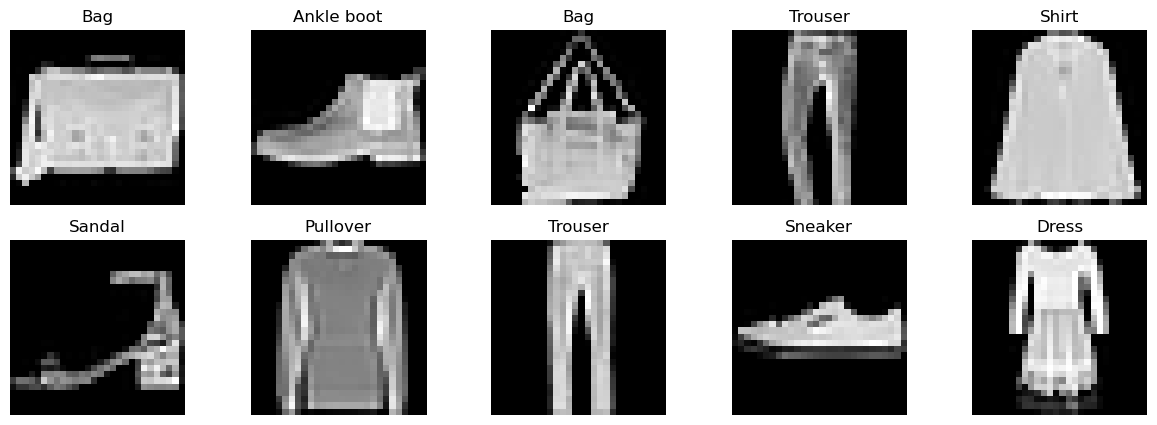

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, GaussianNoise
from keras.models import Model
from keras.optimizers import Adam

# Load Fashion MNIST dataset
(train_data, _), (test_data, _) = fashion_mnist.load_data()
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to display random images
def display_random_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Randomly select an image
        idx = np.random.randint(0, len(images))
        image = images[idx]
        label = labels[idx]
        # Plot the image
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(class_names[label])
        plt.axis('off')
    plt.show()

# Display 10 random color images
display_random_images(train_images, train_labels, class_names, num_images=10)

In [29]:
# Normalize pixel values to be between 0 and 1
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

# Flatten the imagesD
train_data = train_data.reshape((len(train_data), np.prod(train_data.shape[1:])))
test_data = test_data.reshape((len(test_data), np.prod(test_data.shape[1:])))



In [30]:
# Function to create autoencoder model
def autoencoder_model(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder



In [31]:
# Function to create denoising autoencoder model
def denoising_autoencoder_model(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(32, activation='relu')(encoded)
    encoded = GaussianNoise(0.1)(encoded)  # Add Gaussian noise
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    denoising_autoencoder = Model(input_layer, decoded)
    denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return denoising_autoencoder



In [32]:
# Create autoencoder model
autoencoder = autoencoder_model(train_data.shape[1])
autoencoder_history = autoencoder.fit(train_data, train_data,
                                      epochs=10, batch_size=32,
                                      shuffle=True, validation_data=(test_data, test_data))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.3553 - val_loss: 0.2974
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2928 - val_loss: 0.2898
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2863 - val_loss: 0.2857
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2827 - val_loss: 0.2835
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2803 - val_loss: 0.2820
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2792 - val_loss: 0.2808
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2782 - val_loss: 0.2797
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2775 - val_loss: 0.2791
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2762 - val_loss: 0.2785
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2754 - val_loss: 0.2781


In [33]:
# Create denoising autoencoder model
denoising_autoencoder = denoising_autoencoder_model(train_data.shape[1])
denoising_autoencoder_history = denoising_autoencoder.fit(train_data, train_data,
                                                          epochs=10, batch_size=32,
                                                          shuffle=True, validation_data=(test_data, test_data))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.3551 - val_loss: 0.2971
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2935 - val_loss: 0.2888
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2858 - val_loss: 0.2857
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2831 - val_loss: 0.2827
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2803 - val_loss: 0.2814
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2798 - val_loss: 0.2814
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2780 - val_loss: 0.2800
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2778 - val_loss: 0.2792
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2770 - val_loss: 0.2784
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2758 - val_loss: 0.2787


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


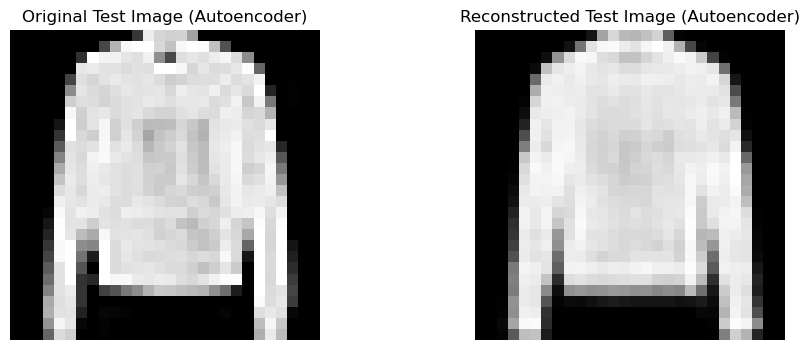

In [48]:
idx = np.random.randint(0, len(test_data))
test_image = test_data[idx:idx+1]

# Predict and visualize reconstructed image for autoencoder
reconstructed_image_autoencoder = autoencoder.predict(test_image)

plt.figure(figsize=(10, 5))

# Plot original test image
plt.subplot(1, 2, 1)
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title('Original Test Image (Autoencoder)')
plt.axis('off')

# Add space between the two images
plt.subplots_adjust(wspace=0.5)

# Plot reconstructed test image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_autoencoder.reshape(28, 28), cmap='gray')
plt.title('Reconstructed Test Image (Autoencoder)')
plt.axis('off')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


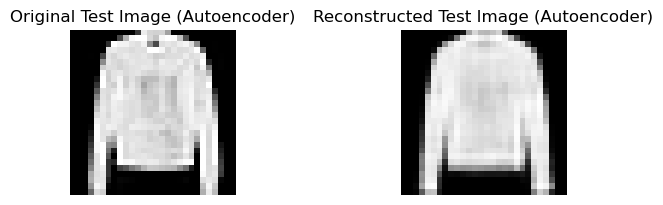

In [64]:
# Predict and visualize reconstructed image for denoising autoencoder
reconstructed_image_denoising_autoencoder = denoising_autoencoder.predict(test_image)
plt.subplot(1, 2, 1)
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title('Original Test Image (Autoencoder)')
plt.axis('off')

# Add space between the two images
plt.subplots_adjust(wspace=1)

# Plot reconstructed test image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_autoencoder.reshape(28, 28), cmap='gray')
plt.title('Reconstructed Test Image (Autoencoder)')
plt.axis('off')

plt.show()

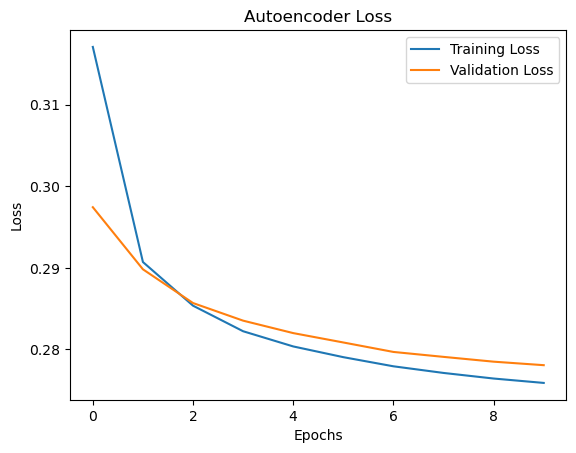

In [65]:
# Plot loss and accuracy for autoencoder
plt.plot(autoencoder_history.history['loss'], label='Training Loss')
plt.plot(autoencoder_history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


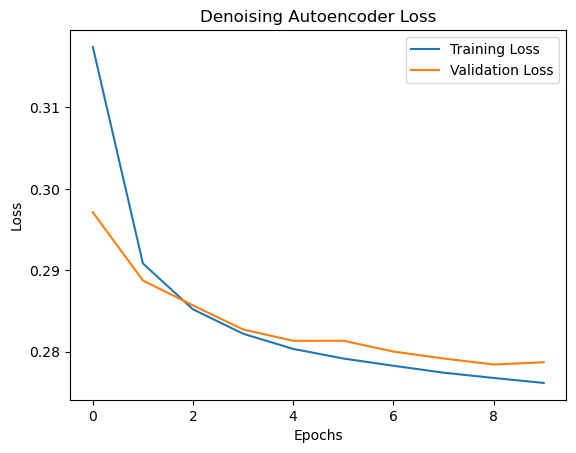

In [66]:
# Plot loss and accuracy for denoising autoencoder
plt.plot(denoising_autoencoder_history.history['loss'], label='Training Loss')
plt.plot(denoising_autoencoder_history.history['val_loss'], label='Validation Loss')
plt.title('Denoising Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()